# Identification
Please indicate your name

Student 1: Defne Gülmez

Student 2: Yalda Eftekhari

# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [38]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercise: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [39]:
def computeFT(I):
    """ Array -> Array[complex] """
    return np.fft.fft2(I)
    
def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(np.fft.fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1 + np.abs(np.fft.fftshift(If)))


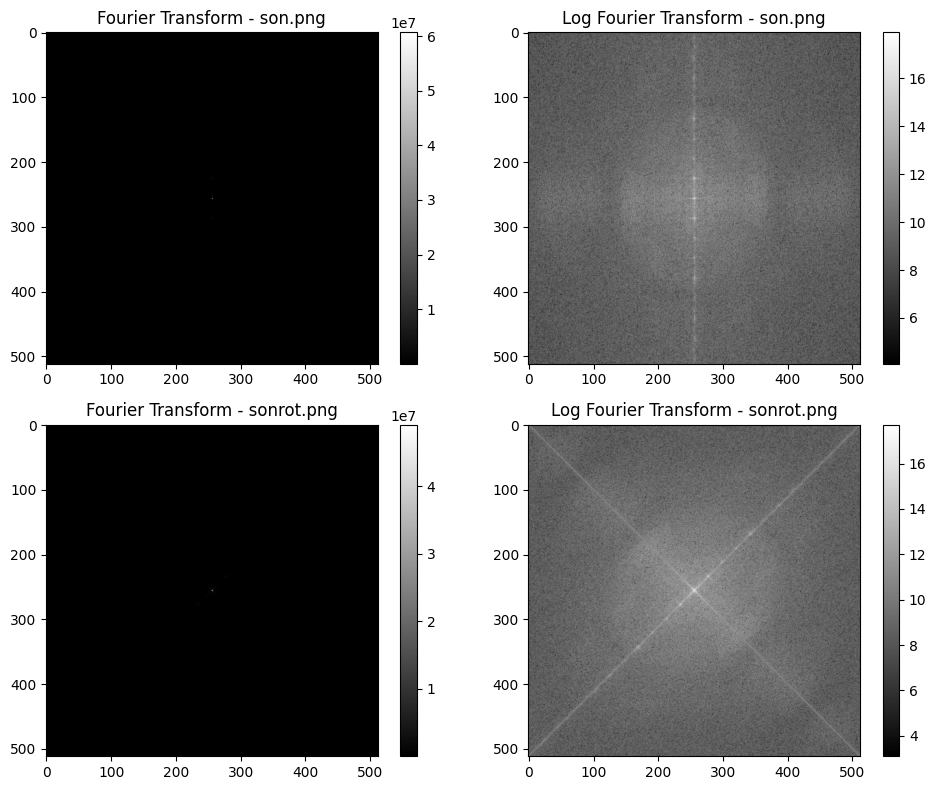

In [40]:
#trying them out
import matplotlib.pyplot as plt
son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

# Compute the Fourier transforms
FT_son = computeFT(son)
FT_sonrot = computeFT(sonrot)

# Visualize the Fourier transforms
FT_son_visual = toVisualizeFT(FT_son)
FT_sonrot_visual = toVisualizeFT(FT_sonrot)

# Visualize the Fourier transforms using a logarithmic scale
FT_son_log_visual = toVisualizeLogFT(FT_son)
FT_sonrot_log_visual = toVisualizeLogFT(FT_sonrot)

# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Fourier Transform - son.png')
plt.imshow(FT_son_visual, cmap='gray')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Log Fourier Transform - son.png')
plt.imshow(FT_son_log_visual, cmap='gray')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Fourier Transform - sonrot.png')
plt.imshow(FT_sonrot_visual, cmap='gray')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title('Log Fourier Transform - sonrot.png')
plt.imshow(FT_sonrot_log_visual, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()


# #makes sense because log changes them into high frequencies, so we can only see them in the log form

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

In [41]:
#functioins from TME1
def thresholdImage(I,s):
    """ Array*int -> Array """
    copy_of_image = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if copy_of_image[i][j] < s:
                copy_of_image[i][j] = 0
            else:
                copy_of_image[i][j] = 255
    return copy_of_image

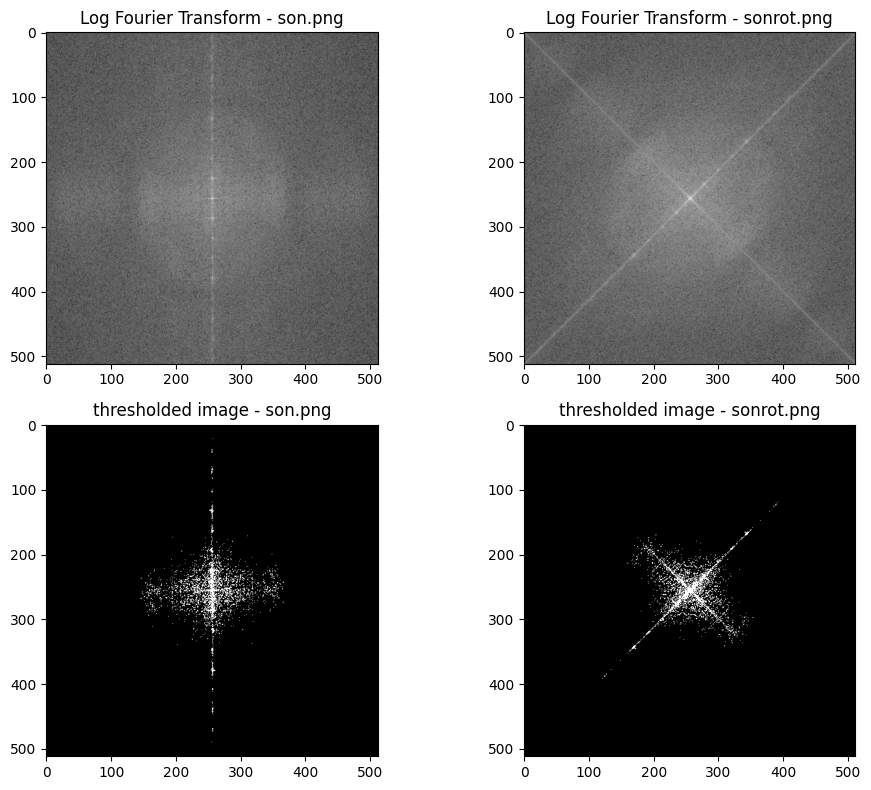

In [42]:
import matplotlib.pyplot as plt

# Fourier Transformations
son_ft = computeFT(son)
sonrot_ft =computeFT(sonrot)

#module using log scale
log_son = toVisualizeLogFT(son_ft)
log_sonrot = toVisualizeLogFT(sonrot_ft)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(log_son, cmap='gray')
plt.title('Log Fourier Transform - son.png')

plt.subplot(2, 2, 2)
plt.imshow(log_sonrot, cmap='gray')
plt.title('Log Fourier Transform - sonrot.png')

#tresholding the module
thresholded_son = thresholdImage(toVisualizeFT(son_ft), 1e5)
thresholded_sonrot = thresholdImage(toVisualizeFT(sonrot_ft), 1e5)

plt.subplot(2, 2, 3)
plt.imshow(thresholded_son,  cmap='gray')
plt.title('thresholded image - son.png')

plt.subplot(2, 2, 4)
plt.imshow(thresholded_sonrot,  cmap='gray')
plt.title('thresholded image - sonrot.png')
plt.tight_layout()
plt.show()



3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

Once the thresholding is done, we can see that the spectrum's edges (representing the higher frequency, low energy parts) are suppressed.
This is because high frequencies correspond to the small details and the noise in the image. However, the center (low frequency, high energy) is highlighted, this is because these parts show the general structure and big shapes within the image.  

The property that is shown here is the translation property. Even though sonrot is the rotated form of son, once we treshold both images, the FT modules becomes quite similar (only shifted just like the pictures). This shows that a rotation in the image itself, only causes a phase shift in the fourier domain but does not actually affect the magnitudes. 

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [43]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    assert alpha <= 1
    assert alpha >= 0
    return alpha*I1 + (1-alpha)*I2


5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

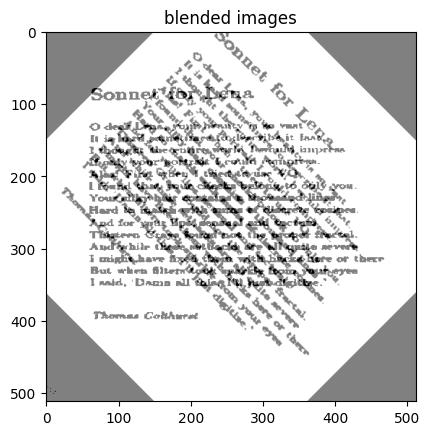

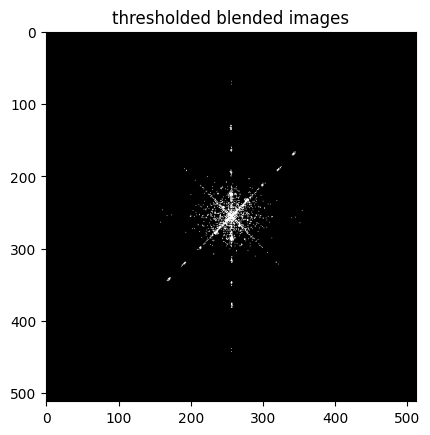

In [44]:
b = blend(son, sonrot, 1/2)
plt.imshow(b, cmap='gray')
plt.title('blended images')
plt.show()
thresholded = thresholdImage(toVisualizeFT(computeFT(b)), 1e5 ) 
plt.title('thresholded blended images')
plt.imshow(thresholded, cmap='gray')

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

The linear property of Fourier transformation is shown here. the function blend combines the two images where α controls the weights(contribution) of these images to the combined image. We can see that first combining the images and then doing the Fourier transformation would be the same as first doing the Fourier transformation and then combining the images. We can see this by looking at the final image which looks like a combination of the two images fe found on the question 2.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

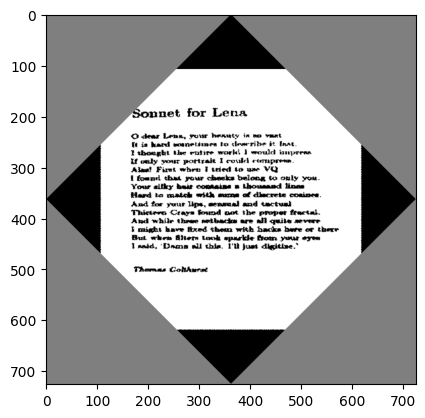

In [45]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below

def rectifyOrientation(I):
    """ array --> array
        rectifies the orientation of an image I
    """
    image_ft = toVisualizeFT(computeFT(I))
    tresholded_image = thresholdImage(image_ft, 300000)
    _, angle = mainOrientation(tresholded_image)
    
    return rotateImage(I, -angle)


rectified_sonrot = rectifyOrientation(sonrot)
plt.imshow(rectified_sonrot, cmap='gray')

8. Experiment `rectifyOrientation()` on `sonrot`, and on rotations of `img/port.jpg` (using `rotateImage()`) with various angles.  

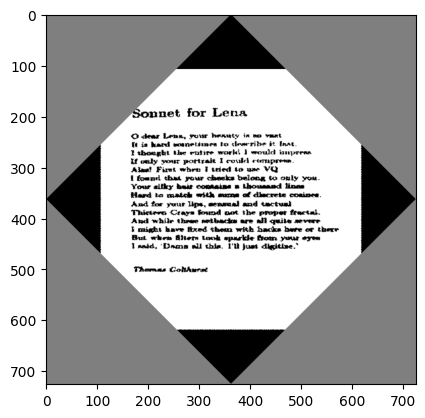

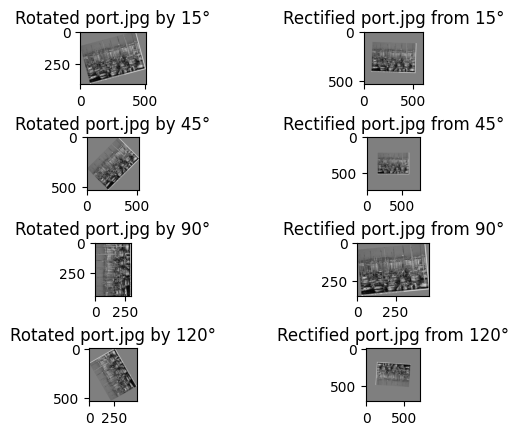

In [52]:
rectified_sonrot = rectifyOrientation(sonrot)
plt.imshow(rectified_sonrot, cmap='gray')
plt.show()
#lets try with different angles for port
port = np.array(Image.open('img/port.jpg'))

angles =[15, 45, 90, 120]
for i, angle in enumerate(angles):
    # Rotate but don't do anything else
    rotated_port = rotateImage(port, angle)
    # Apply rectifyOrientation on the rotated image
    rectified_port = rectifyOrientation(rotated_port)
    
    plt.subplot(4, 2, 2 * i + 1)  
    plt.imshow(rotated_port, cmap='gray')
    plt.title(f"Rotated port.jpg by {angle}°")

    plt.subplot(4, 2, 2 * i + 2)
    plt.imshow(rectified_port, cmap='gray')
    plt.title(f"Rectified port.jpg from {angle}°")

plt.subplots_adjust(hspace=1, wspace=0.3)
plt.show()